In [1]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from classy import Class
from scipy.optimize import fsolve
from math import pi

In [2]:
#import the data needed to resolve the problem (EXERCISE 03)
data04 = open("Exercise0/TFG04.dat", "r")

#add the data to different lists
l_exp04 = np.array([])
tCl_exp04 = np.array([])
for line in data04.readlines():
    lista = line.split()
    l_exp04 = np.append(l_exp04, float(lista[0]))
    tCl_exp04 = np.append(tCl_exp04, float(lista[1]))

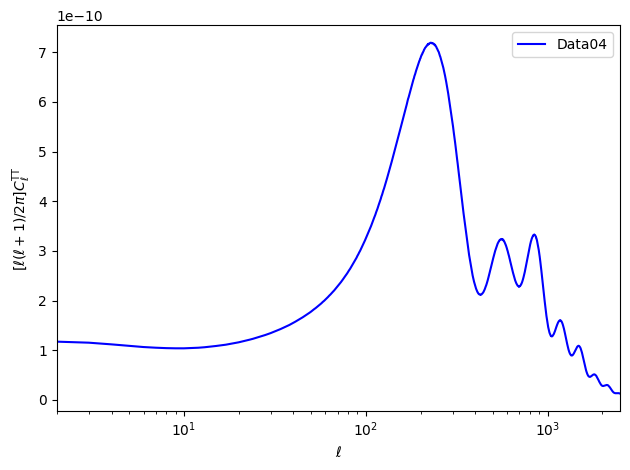

In [3]:
#Create figures
fig_dat, ax_dat = plt.subplots()
legarray = []

#plot data imported
ax_dat.semilogx(l_exp04,tCl_exp04,color='b',linestyle='-')
legarray.append(r'Data04') 

# output of C_l^TT figure
ax_dat.set_xlim([2,2500])
ax_dat.set_xlabel(r'$\ell$')
ax_dat.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_dat.legend(legarray)
fig_dat.tight_layout()  

In [4]:
# Variable wished to determine
var_name = ['h','N_ur']
var_array = [np.linspace(0.5,0.7,3), np.linspace(3.0,4.0,3)]
var_num = [len(var_array[0]), len(var_array[1])]
var_legend = [r'$h$', r'$N_{eff}$']
var_figname = ['h', 'N_eff']

# Fixed settings
common_settings = {# LambdaCDM parameters
                   'recombination': 'RECFAST',
                   'T_cmb':2.7,
                   'omega_b':0.022,
                   'omega_cdm':0.132,
                   'A_s':2.2e-9,
                   'n_s':0.965,
                   'z_reio':11.357,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl,mPk',
                   }

#Other variables
twopi = 2.*pi

# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

 * Compute with h=0.500000
	 * Compute with N_ur=3.000000
	 * Compute with N_ur=3.500000
	 * Compute with N_ur=4.000000
 * Compute with h=0.600000
	 * Compute with N_ur=3.000000
	 * Compute with N_ur=3.500000
	 * Compute with N_ur=4.000000
 * Compute with h=0.700000
	 * Compute with N_ur=3.000000
	 * Compute with N_ur=3.500000
	 * Compute with N_ur=4.000000


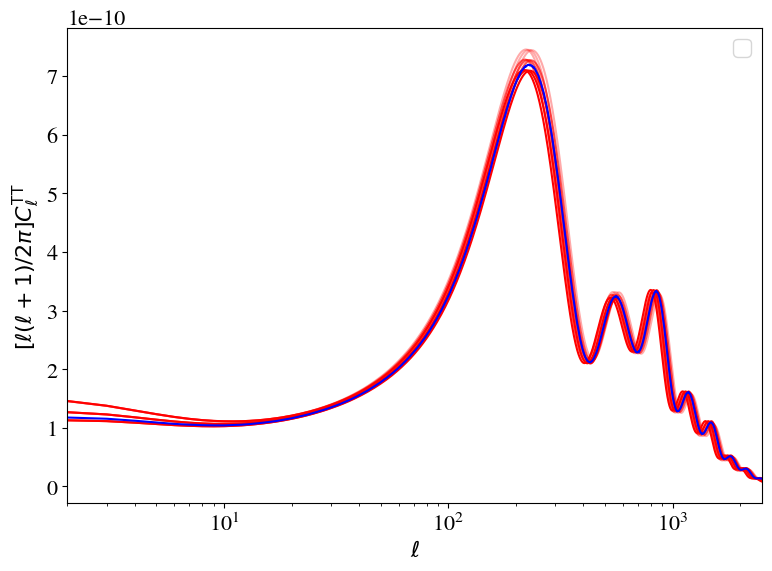

In [5]:
#Create figures
fig_TT, ax_TT = plt.subplots()
legarray = []

M = Class()
# loop over varying parameter values
for i,var0 in enumerate(var_array[0]):
    print (' * Compute with %s=%f'%(var_name[0],var0))

    for j,var1 in enumerate(var_array[1]):
        print ('\t * Compute with %s=%f'%(var_name[1],var1))
        # deal with colors and legends
        var_color = 'r'
        var_alpha = 1.*(var_num[0]+var_num[1]-2*j)/(var_num[0]+var_num[1])
        # call CLASS
        M.set(common_settings)
        M.set({var_name[0]:var0,
               var_name[1]:var1})
        M.compute()

        # get Cls
        clM = M.raw_cl(2500)
        ll = clM['ell'][2:]
        clTT = clM['tt'][2:]
        clEE = clM['ee'][2:]
        clPP = clM['pp'][2:]

        tCl = clTT*ll*(ll+1)/twopi

        # plot C_l^TT
        ax_TT.semilogx(ll,tCl,color=var_color,alpha=var_alpha,linestyle='-')

        # reset CLASS
        M.empty()

ax_TT.semilogx(l_exp04,tCl_exp04,color='b',linestyle='-')

# output of C_l^TT figure
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout() 
